In [13]:
from utils.kanhon_utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
from IPython.display import display, HTML
from utils.lta_omv_scraper import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import time
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Fill missing 'make' info from title

In [14]:
orig_df = pd.read_csv(r"./dataset/train.csv")

# clean model
orig_df['model'] = orig_df['model'].apply(lambda x:x.replace('(', ''))
orig_df['reg_date_dt'] = orig_df['reg_date'].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))
orig_df['reg_date_year'] = orig_df['reg_date_dt'].apply(lambda x:x.year)
orig_df['reg_date_month'] = orig_df['reg_date_dt'].apply(lambda x:x.month)

In [15]:
train_df, val_df = train_test_split(orig_df, test_size=0.2, random_state=42, shuffle=True)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 23311 to 23654
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         20000 non-null  int64         
 1   title              20000 non-null  object        
 2   make               18971 non-null  object        
 3   model              20000 non-null  object        
 4   description        19459 non-null  object        
 5   manufactured       19993 non-null  float64       
 6   original_reg_date  209 non-null    object        
 7   reg_date           20000 non-null  object        
 8   type_of_vehicle    20000 non-null  object        
 9   category           20000 non-null  object        
 10  transmission       20000 non-null  object        
 11  curb_weight        19759 non-null  float64       
 12  power              17891 non-null  float64       
 13  fuel_type          4661 non-null   object        
 14  engine_

In [56]:
# train_df['reg_date_year'].value_counts()

In [57]:
# idx = train_df[train_df['make'].isna()].index
# idx_val = val_df[val_df['make'].isna()].index
# val_df.loc[idx_val]

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # URL of the webpage to scrape
# url = 'https://www.carlogos.org/car-brands-a-z/'

# # Define headers to mimic a web browser
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
#                   '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
# }

# # Send a GET request to the webpage with headers
# response = requests.get(url, headers=headers)
# response.raise_for_status()  # Check for request errors

# # Parse the HTML content
# soup = BeautifulSoup(response.text, 'html.parser')

# # Find the main content div that contains the list of car brands
# main_content = soup.find('div', class_='main-l')

# # Initialize an empty list to store car brands
# car_brands = []

# # Find all 'dl' elements within the main content
# dl_elements = main_content.find_all('dl')

# for dl in dl_elements:
#     # Each 'dl' represents a letter section
#     # Find all 'dd' elements within each 'dl', which contain the car brand links
#     dd_elements = dl.find_all('dd')
#     for dd in dd_elements:
#         # Get the car brand name from the 'a' tag text
#         brand_name = dd.find('a').get_text(strip=True)
#         car_brands.append(brand_name)

# # Print the total number of car brands found
# print(f"Total car brands found: {len(car_brands)}")

# # Print the list of car brands
# for brand in car_brands:
#     print(brand)


In [58]:
make_ls = train_df['make'].dropna().unique()

make_model_imputer = MakeModelImputer(make_ls)
train_df = make_model_imputer.fit_transform(train_df)
val_df = make_model_imputer.transform(val_df) # 4 rows missing

In [52]:
# ## Sanity check for make_model_imputer
# train_df.loc[idx]
# val_df.loc[idx_val]

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month
12456,1302031,Hyundai Avante 1.6M (COE till 05/2024),hyundai,avante,looking for exporter to,2009.0,NaN,10-jun-2009,mid-sized sedan,"coe car, direct owner sale",...,NaN,NaN,uncategorized,view specs of the hyundai avante,NaN,NaN,900.0,2009-06-10,2009,6
15191,1307337,Honda Vezel Hybrid 1.5A X,honda,vezel,showroom condition! 100% loan available! full ...,2017.0,NaN,10-may-2018,suv,"parf car, hybrid cars",...,NaN,NaN,uncategorized,fuel efficient 1.5l 4 cylinder inline dohc i-v...,"leather upholstery, sports rims, pioneer touch...",NaN,67800.0,2018-05-10,2018,5
6253,1278944,Honda Civic 1.6A VTi (COE till 02/2029),honda,civic,0,2008.0,NaN,23-feb-2009,mid-sized sedan,coe car,...,NaN,NaN,uncategorized,powerful and responsive 1.6l 4 cylinder inline...,"new sports rims, audio system, reverse sensors...",NaN,59888.0,2009-02-23,2009,2
13952,1296512,Mercedes-Benz G-Class G63 AMG 4MATIC,mercedes-benz,amg,one lady owner only. super low mileage. park u...,2020.0,NaN,10-may-2021,suv,"parf car, rare & exotic, premium ad car, low m...",...,NaN,NaN,uncategorized,powered by a 4.0l bi-turbo v8 hand built engin...,"360 parking cameras/sensors. 22"" original spor...",NaN,732800.0,2021-05-10,2021,5
13338,1330619,Honda Fit 1.5A RS (COE till 07/2028),honda,fit,well maintained by lady owner! comes with a ve...,2007.0,NaN,21-aug-2008,hatchback,"coe car, low mileage car",...,NaN,NaN,uncategorized,reliable and fuel efficient 1.5l i-vtec engine...,"leather seats, retractable side mirrors, andro...",NaN,57800.0,2008-08-21,2008,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,1280328,Honda Jazz 1.5A RS,honda,jazz,flexible in-house loan and bank loan available...,2016.0,NaN,16-mar-2017,hatchback,"parf car, premium ad car",...,NaN,NaN,uncategorized,reliable 1.5l dohc i-vtec engine with earth dr...,touch screen audio system with bluetooth funct...,NaN,48800.0,2017-03-16,2017,3
22192,1301634,Volkswagen Golf 1.4A TSI (COE till 05/2032),volkswagen,golf,0,2013.0,NaN,29-apr-2013,hatchback,"coe car, premium ad car",...,NaN,NaN,uncategorized,"1.4l turbocharged engine, 7 speed dsg auto, sp...","tvs stage 2+ ecu/dsg, approved bastuck catback...",NaN,130000.0,2013-04-29,2013,4
17608,1327241,Kia Cerato 1.6A LX,kia,cerato,consignment unit! 1 owner and well taken care ...,2018.0,NaN,03-apr-2019,mid-sized sedan,parf car,...,NaN,NaN,uncategorized,view specs of the kia cerato,"factory fitted infotainment, reverse camera/se...",NaN,64800.0,2019-04-03,2019,4
1748,1302879,MINI Cooper Electric,mini,cooper,17,2021.0,NaN,28-dec-2022,hatchback,"parf car, premium ad car, low mileage car, ele...",...,NaN,NaN,uncategorized,proven electric powertrain from bmw i3 that is...,"panoramic glassroof, wireless smartphone conne...",NaN,174588.0,2022-12-28,2022,12


In [46]:
# compiled_regex = compile_make_pattern(make_ls)
# train_df = apply_make_extraction(train_df, compiled_regex)

In [59]:
train_df['make'] = train_df['make'].fillna(train_df['extracted_make'])
train_df

KeyError: 'extracted_make'

In [434]:
# for sanity check
# missing_idx = train_df[train_df['make'] == 1].index
train_df[train_df['model'] == '(coe']

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,extracted_make


### 'Feature' extract cylinder count 

In [32]:
train_df['cylinder_cnt'] = train_df['features'].apply(lambda x: extract_cylinder_from_features(x) if pd.notnull(x) else None)

In [33]:
train_df['cylinder_cnt'].value_counts()

cylinder_cnt
4.0     6741
6.0     1133
3.0      773
8.0      601
12.0     135
10.0      51
5.0       10
7.0        2
2.0        2
1.0        1
Name: count, dtype: int64

In [80]:
# display(HTML(train_df[train_df['type_of_vehicle'] == 'truck'].to_html()))
# display(HTML(train_df[train_df['model'] == 'dyna'].to_html()))

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,extracted_make,cylinder_cnt
251,1327467,Toyota Dyna 150 3.0M,toyota,dyna,"one careful owner with genuine low mileage done 155421km, original upholstery, full checker plate, durable toyota dyna 150 10ft lorry, extremely condition, like new dyna, all wear and tear parts replaced, no repairs needed, new paintwork, don't miss it out before is gone, call us for more information.",2014.0,NaN,17-nov-2014,truck,-,manual,1680.0,NaN,diesel,2982.0,1.0,NaN,57389,NaN,1431.0,155421.0,27856.0,1393.0,NaN,16-nov-2034,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,14800.0,toyota,4.0
307,1313950,Toyota Dyna 150 2.8M,toyota,dyna,"y-plate toyota dyna. 1 owner only! attached with retractable canopy. full checker plate. vehicle very well maintained, in good condition. still under agent warranty. contact us now for viewing!",2022.0,NaN,31-oct-2022,truck,premium ad car,manual,1800.0,NaN,diesel,2755.0,1.0,12270.0,47365,NaN,37892.0,NaN,31608.0,1581.0,NaN,30-oct-2042,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,101800.0,toyota,4.0
1007,1306422,Toyota Dyna 150 3.0M,toyota,dyna,g plate diesel manual transmission! powerful & smooth 3l engine! genuine low mileage and 1 ownership only! exclusive premium warranty provided! free full checker plate and canopy without any cost. flexible financing package can be discussed. attractive trade in quotes offered. immediate handover anytime. whatsapp/call our friendly sales consultant to view this beauty today!,2020.0,NaN,24-aug-2020,truck,premium ad car,manual,1800.0,NaN,diesel,2982.0,1.0,13700.0,19911,NaN,12328.0,68000.0,35507.0,1776.0,NaN,23-aug-2040,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,84800.0,toyota,4.0
1090,1163193,Toyota Dyna 150 2.8M,toyota,dyna,"toyota dyna! immediate stock! most reliable toyota dyna in the market drive off with no worries! full agent unit warranty & free servicing package. comes with 3 years or 100,000km warranty! full loan with low interest rate or flexible in house loan available. trade in are welcome too! hurry and call our sales representative now to book an appointment to view and test drive now!",2022.0,NaN,30-dec-2022,truck,premium ad car,manual,1780.0,NaN,diesel,2755.0,1.0,13560.0,26409,NaN,22567.0,NaN,31608.0,1581.0,NaN,29-dec-2042,uncategorized,view specs of the toyota dyna 150 diesel,"front recording camera, single din radio mp3 player, reverse sensor, electric side mirror and many more free accessories!",NaN,115888.0,toyota,4.0
1195,1328728,Toyota Dyna 150 3.0M,toyota,dyna,smooth engine and gearbox transmission. silent undercarriage. attractive financing options available. all trade-ins are welcomed. contact our sales team now for more information.,2016.0,NaN,29-jun-2017,truck,-,manual,1740.0,NaN,diesel,2982.0,3.0,15770.0,38501,NaN,10865.0,NaN,32833.0,1642.0,NaN,28-jun-2037,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,44500.0,toyota,4.0
1252,1311994,Toyota Dyna 150 3.0M,toyota,dyna,good condition and well maintained regularly. standard stock accessories from toyota since day 1.,2016.0,NaN,29-jul-2016,truck,direct owner sale,manual,1780.0,NaN,diesel,2982.0,2.0,15130.0,37589,NaN,7652.0,NaN,35220.0,1761.0,NaN,28-jul-2036,uncategorized,view specs of the toyota dyna 150 diesel,NaN,NaN,30800.0,toyota,4.0
1309,1314305,Toyota Dyna 150 3.0M (COE till 07/2028),toyota,dyna,"high paper value, 10 footer lorry, diesel, half canopy with checkered plate, very well maintained, can renew for another 5 years coe, view to appreciate the condition at tampines.",2013.0,NaN,01-oct-2013,truck,coe car,manual,1780.0,NaN,diesel,2982.0,3.0,11070.0,39181,NaN,31710.0,110000.0,24970.0,1249.0,NaN,30-sep-2033,uncategorized,view specs of the 

In [63]:
cylinder_count_dict = extract_cylinder_by_model_make(train_df)

In [73]:
# Apply the impute function to the DataFrame
train_df['cylinder_cnt'] = train_df.apply(lambda x:impute_row_by_make_model(x, cylinder_count_dict, 'cylinder_cnt'), axis=1)

In [89]:
# fill remaining values with median of 4 cylinder (most common engine)
median_cylinder_cnt = train_df['cylinder_cnt'].median(axis=0)
train_df['cylinder_cnt'] = train_df['cylinder_cnt'].fillna(median_cylinder_cnt)

### Extract omv/arf

In [362]:
result_ls = get_lta_omv_data(2002, 2025)

In [363]:
df_lta_car_data = preprocess_lta_omv_data(result_ls)

In [364]:
df_lta_car_data['make_clean'].unique()

array(['alfa romeo', 'audi', 'bmw', 'chrysler', 'citroen', 'daewoo',
       'daihatsu', 'ford', 'honda', 'hyundai', 'jaguar', 'kia', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'proton', 'renault', 'rolls-royce', 'rover', 'saab',
       'seat', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo', 'land rover', 'perodua', 'ferrari', 'daimler', 'bentley',
       'mini cooper', 'maserati', 'mini', 'smart', 'ssangyong',
       'chervolet', 'aston martin', 'jeep', 'chevrolet', 'lamborghini',
       'mg-f', 'mg', 'fiat', 'chery', 'td cars', 'dodge', 'lotus',
       'geely', 'mitsuoka', 'hafei', 'dongfeng', 'soyat', 'naza',
       'wuling', 'chana', 'golden dragon', 'zotye', 'hummer', 'cadillac',
       'foton', 'infiniti', 'mclaren', 'alpina', 'byd', 'bluecar',
       'maxus', 'tesla', 'alpine', 'polestar', 'great wall', 'gac',
       'xpeng', 'zeekr'], dtype=object)

In [242]:
# df_lta_car_data.to_csv('./dataset/lta_omv_data.csv')


#### impute data from make and model 

In [374]:
def impute_using_lta_data(row):
    # print(row)
    if not np.isnan(row['omv']):
        return row['omv']
    else:
        make = row['make']
        model = row['model']
        year = row['reg_date_year']
        lookup_by_make_model_year = df_lta_car_data[(df_lta_car_data['make_clean'] == make) & (df_lta_car_data['model_split'].str.contains(model)) & (df_lta_car_data['year'] == year)]
        
        lookup_by_make_model = df_lta_car_data[(df_lta_car_data['make_clean'] == make) & (df_lta_car_data['model_split'].str.contains(model))]

        lookup_by_make = df_lta_car_data[(df_lta_car_data['make_clean'] == make)]
        
        if not lookup_by_make_model_year.empty:
            # print('lookup_by_make_model_year')
            return lookup_by_make_model_year['omv_clean'].mean()
        elif not lookup_by_make_model.empty:
            # print('lookup_by_make_model')
            return lookup_by_make_model['omv_clean'].mean()
        elif not lookup_by_make.empty:
            # print('lookup_by_make')
            return lookup_by_make['omv_clean'].mean()
        else: 
            return None

In [351]:
train_null_df = train_df[train_df['omv'].isna()]

In [352]:
df_lta_car_data[(df_lta_car_data['make_clean'] == 'mercedes-benz') & (df_lta_car_data['model_split'].str.contains('911sc')) & (df_lta_car_data['year'] == 2005)]['omv_clean'].mean()

nan

In [353]:
df_lta_car_data['make_clean'].unique()

array(['alfa romeo', 'audi', 'bmw', 'chrysler', 'citroen', 'daewoo',
       'daihatsu', 'ford', 'honda', 'hyundai', 'jaguar', 'kia', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'proton', 'renault', 'rolls-royce', 'rover', 'saab',
       'seat', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo', 'land rover', 'perodua', 'ferrari', 'daimler', 'bentley',
       'mini cooper', 'maserati', 'mini', 'smart', 'ssangyong',
       'chervolet', 'aston martin', 'jeep', 'chevrolet', 'lamborghini',
       'mg-f', 'mg', 'fiat', 'chery', 'td cars', 'dodge', 'lotus',
       'geely', 'mitsuoka', 'hafei', 'dongfeng', 'soyat', 'naza',
       'wuling', 'chana', 'golden dragon', 'zotye', 'hummer', 'cadillac',
       'foton', 'infiniti', 'mclaren', 'alpina', 'byd', 'bluecar',
       'maxus', 'tesla', 'alpine', 'polestar', 'great wall', 'gac',
       'xpeng', 'zeekr'], dtype=object)

In [485]:
train_df['omv_new'] = train_df['omv']
train_df['omv_new'] = train_df.apply(impute_using_lta_data, axis=1)
train_df['omv_new'] = train_df['omv_new'].fillna(train_df['omv_new'].mean())

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         25000 non-null  int64         
 1   title              25000 non-null  object        
 2   make               23684 non-null  object        
 3   model              25000 non-null  object        
 4   description        24320 non-null  object        
 5   manufactured       24993 non-null  float64       
 6   original_reg_date  255 non-null    object        
 7   reg_date           25000 non-null  object        
 8   type_of_vehicle    25000 non-null  object        
 9   category           25000 non-null  object        
 10  transmission       25000 non-null  object        
 11  curb_weight        24693 non-null  float64       
 12  power              22360 non-null  float64       
 13  fuel_type          5879 non-null   object        
 14  engine

In [487]:
# display(HTML(train_df.head(100).to_html()))

In [376]:
# sanity check
for i in range(10):
    print(df_lta_car_data[(df_lta_car_data['make_clean'] == train_null_df.iloc[i]['make']) & (df_lta_car_data['model_split'].str.contains(train_null_df.iloc[i]['model']))]['omv_clean'].mean())

nan
nan
22145.32950191571
nan
nan
nan
72662.36305732484
72662.36305732484
nan
150573.36170212767


### Parse category

In [55]:
train_df['category']

23311                                       premium ad car
23623                                              coe car
1020                              parf car, premium ad car
12645                                             parf car
1533                                              parf car
                               ...                        
21575    parf car, consignment car, sgcarmart warranty ...
5390                              parf car, premium ad car
860                                               parf car
15795    parf car, direct owner sale, rare & exotic, lo...
23654                              coe car, premium ad car
Name: category, Length: 20000, dtype: object

In [114]:
train_df['category_split'] = train_df['category'].str.split(',').apply(lambda x: [item.strip() for item in x])
train_df['category_split']

0                                               [parf car]
1                               [parf car, premium ad car]
2               [coe car, premium ad car, low mileage car]
3                                [coe car, premium ad car]
4                                [coe car, premium ad car]
                               ...                        
24995           [coe car, premium ad car, low mileage car]
24996         [parf car, direct owner sale, rare & exotic]
24997    [parf car, premium ad car, low mileage car, sg...
24998                                           [parf car]
24999                           [parf car, premium ad car]
Name: category_split, Length: 25000, dtype: object

In [111]:
max(train_df['category_split'].apply(lambda x:len(x)).to_numpy())

6

In [128]:
train_df['category_split'].iloc[:,].values

array([list(['parf car']), list(['parf car', 'premium ad car']),
       list(['coe car', 'premium ad car', 'low mileage car']), ...,
       list(['parf car', 'premium ad car', 'low mileage car', 'sgcarmart warranty cars']),
       list(['parf car']), list(['parf car', 'premium ad car'])],
      dtype=object)

In [135]:
mlb = MultiLabelBinarizer()
train_df = train_df.join(pd.DataFrame(mlb.fit_transform(train_df['category_split']),
                          columns=mlb.classes_,
                          index=train_df.index))

In [137]:
mlb.classes_

array(['-', 'almost new car', 'coe car', 'consignment car',
       'direct owner sale', 'electric cars', 'hybrid cars',
       'imported used vehicle', 'low mileage car', 'opc car', 'parf car',
       'premium ad car', 'rare & exotic', 'sgcarmart warranty cars',
       'sta evaluated car', 'vintage cars'], dtype=object)

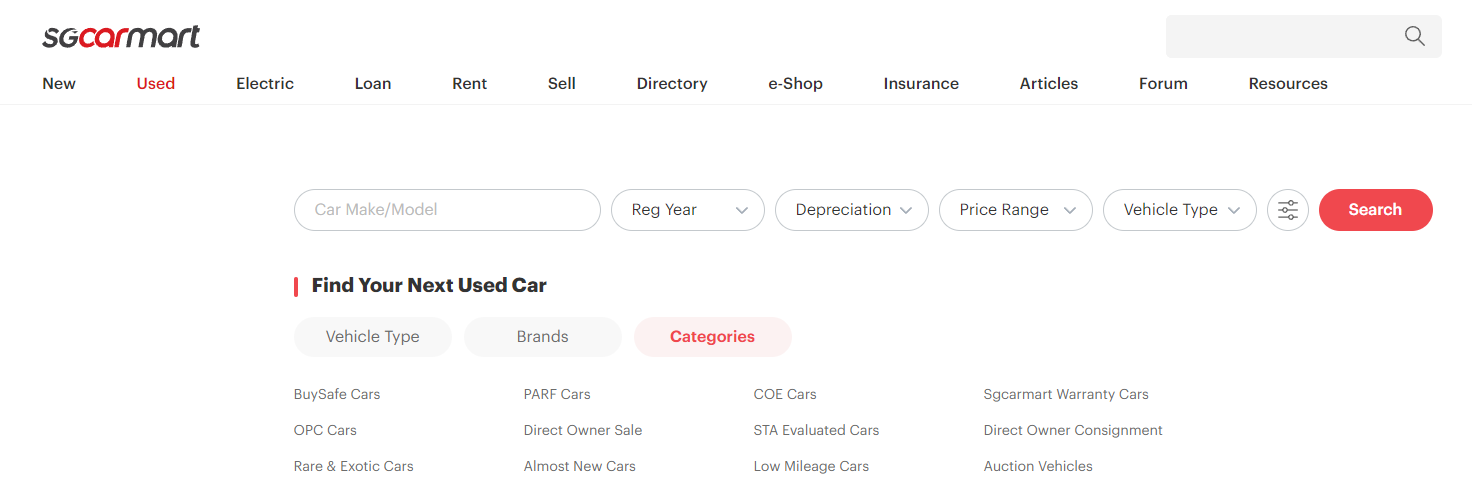

In [140]:
train_df[['almost new car', 'coe car', 'consignment car',
       'direct owner sale', 'electric cars', 'hybrid cars',
       'imported used vehicle', 'low mileage car', 'opc car', 'parf car',
       'premium ad car', 'rare & exotic', 'sgcarmart warranty cars',
       'sta evaluated car', 'vintage cars']]

,almost new car,coe car,consignment car,direct owner sale,electric cars,hybrid cars,imported used vehicle,low mileage car,opc car,parf car,premium ad car,rare & exotic,sgcarmart warranty cars,sta evaluated car,vintage cars
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
24996,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
24997,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
24998,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [120]:
train_df['category_split'].iloc[:,].values

array([list(['parf car']), list(['parf car', 'premium ad car']),
       list(['coe car', 'premium ad car', 'low mileage car']), ...,
       list(['parf car', 'premium ad car', 'low mileage car', 'sgcarmart warranty cars']),
       list(['parf car']), list(['parf car', 'premium ad car'])],
      dtype=object)

In [379]:
len(train_df['model'].unique())

799

In [393]:
train_df[train_df['category'] == '-'].head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,parf car,premium ad car,rare & exotic,sgcarmart warranty cars,sta evaluated car,vintage cars,reg_date_dt,reg_date_year,reg_date_month,omv_new
12,1270388,Mitsubishi Fuso Canter FEA01,mitsubishi,canter,"mitsubishi freezer truck with 1 owner, new pai...",2019.0,NaN,31-may-2019,truck,-,...,0,0,0,0,0,0,2019-05-31,2019,5,29628.0
102,1312688,Peugeot Partner 1.6A HDi,peugeot,partner,brand new paintwork!,2016.0,NaN,03-aug-2017,van,-,...,0,0,0,0,0,0,2017-08-03,2017,8,19591.0
111,1319901,Honda N-Van Turbo Style Fun Honda Sensing,honda,n-van,well-maintained by owner! regularly serviced b...,2022.0,NaN,29-apr-2022,van,-,...,0,0,0,0,0,0,2022-04-29,2022,4,18213.0
114,1327337,Toyota Hiace 3.0M DX,toyota,hiace,very well maintained by premium owner! no repa...,2016.0,NaN,06-sep-2016,van,-,...,0,0,0,0,0,0,2016-09-06,2016,9,29761.0
209,1321103,Toyota Hiace 3.0A,toyota,hiace,1 onwer since day one! genuine low mileage! ro...,2020.0,NaN,21-sep-2020,van,-,...,0,0,0,0,0,0,2020-09-21,2020,9,29352.0


### Eco category

In [417]:
train_df['model'].unique()

array(['range', 'c200', 'odyssey', 'altis', 'gs', 's2000', 'huracan',
       'avante', 'evolution', 'c180', 'impreza', 'canter', 'e200', '318i',
       'q3', 'vios', 'outlander', '3', 'civic', '630ci', '2', '504',
       'noah', 'golf', 'elantra', 'e', 'stream', 'arteon', 'continental',
       '430i', 'e230', 'cr-v', 'glc250', 'shuttle', '840i', 'amg', '216i',
       'city', 'actyon', 'cyz52k', 'm4', 'q2', 'v40', 'asx', 'cabstar',
       'harrier', 'cerato', 'i-pace', 'estima', 'qashqai', 'cooper',
       'hiace', 'f', 'rx', 'stonic', 'leon', 'i30', 'nv350', 'x4', 'note',
       'rush', 'es', 'glc200', 'partner', 'vezel', 'fit', '420i',
       'passat', 'r8', 'a1', 'e-dispatch', 'q5', 'alphard', '328',
       'accent', 'macan', 'getz', 'model', 's60', 'wraith', 'cayenne',
       'discovery', 'every', 'attrage', 'lancer', 'forester', 'spacia',
       'n-van', 'cla180', 'x3', 'gla180', 'a200', 'citan', 'cx-3', 'a3',
       'fvr34', 'seltos', 's90', 'jazz', 'm3', '523i', 'freed', 'c4',
  

In [394]:
eco_df = pd.read_csv('./dataset/CO2 Emissions_Canada.csv')

In [396]:
eco_df['make_clean'] = eco_df['Make'].apply(lambda x:x.lower())
eco_df['model_clean'] = eco_df['Model'].apply(lambda x:x.lower())

In [397]:
eco_df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),make_clean,model_clean
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,acura,ilx
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,acura,ilx
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,acura,ilx hybrid
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,acura,mdx 4wd
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,acura,rdx awd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,volvo,xc40 t5 awd
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,volvo,xc60 t5 awd
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,volvo,xc60 t6 awd
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,volvo,xc90 t5 awd


In [473]:
def impute_using_eco_data(row):
    make = row['make']
    model = row['model']
    year = row['reg_date_year']
    # try:
    #     lookup_by_make_model = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'].str.contains(model))]
    # except Exception as e:
    #     print(e, make,model,year,row['model'])
    
    lookup_by_make_model = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'].str.contains(model))]
    lookup_by_make_model_exact = eco_df[(eco_df['make_clean'] == make) & (eco_df['model_clean'] == model)]

    # lookup_by_make = df_lta_car_data[(df_lta_car_data['make_clean'] == make)]
    
    if not lookup_by_make_model_exact.empty:
        return lookup_by_make_model_exact['CO2 Emissions(g/km)'].mean()
    elif not lookup_by_make_model.empty:
        return lookup_by_make_model['CO2 Emissions(g/km)'].mean()
    else:
        return Nonez

In [474]:
train_df['co2_emission'] = train_df.apply(impute_using_eco_data, axis=1)

In [477]:
train_df['co2_emission'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: co2_emission
Non-Null Count  Dtype  
--------------  -----  
10933 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


In [464]:
eco_df[(eco_df['make_clean'] == 'bmw') & (eco_df['model_clean'].str.contains('220i'))]['CO2 Emissions(g/km)']

76      193
77      200
78      202
79      181
80      181
       ... 
6635    254
6636    318
6637    318
6638    200
6639    216
Name: CO2 Emissions(g/km), Length: 527, dtype: int64

In [480]:
import matplotlib.pyplot as plt

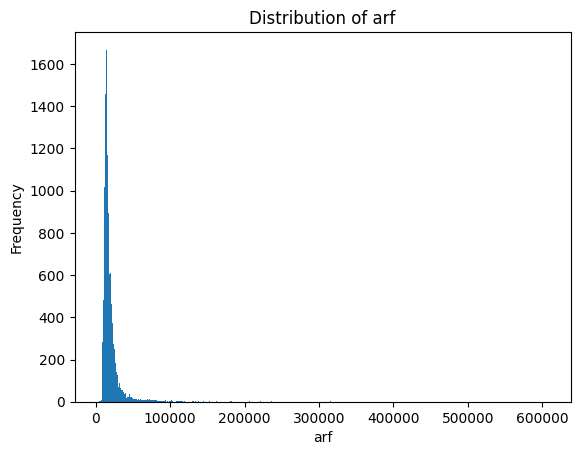

In [481]:
plt.hist(train_df['depreciation'], bins=1000)
plt.ticklabel_format(style='plain', useOffset=False, axis='x')

plt.title('Distribution of depreciation')
plt.xlabel('arf')
plt.ylabel('Frequency')
plt.show()




In [483]:
train_df[train_df['make'] == 'mercedes-benz']

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month,co2_emission
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12,NaN
8,1297569,Mercedes-Benz C-Class C200 Avantgarde,mercedes-benz,c200,best-looking pearl-white c200 with nice black...,2017.0,NaN,28-nov-2017,luxury sedan,"parf car, premium ad car, low mileage car",...,NaN,uncategorized,"2.0l turbo-charged engine, 181 bhp, 9g-tronic ...","electric/memory leather seats, sports rims, fa...",NaN,102500.0,2017-11-28,2017,11,NaN
10,1307450,Mercedes-Benz C-Class C180K (COE till 02/2031),mercedes-benz,c180,"full loan/bank loan available, superbly well m...",2010.0,NaN,16-mar-2011,luxury sedan,"coe car, premium ad car",...,NaN,uncategorized,powerful 1.6l supercharged engine delivering 1...,"bluetooth carplay, camera, multi function stee...",NaN,87000.0,2011-03-16,2011,3,NaN
13,1277224,Mercedes-Benz E-Class E200d,mercedes-benz,e200,NaN,2017.0,NaN,04-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,uncategorized,2 litre turbocharged 4-cylinder engine pushing...,"colour shift interior ambient lighting, 360 ca...",NaN,103800.0,2017-12-04,2017,12,NaN
32,1307612,Mercedes-Benz E-Class E230 (COE till 12/2028),mercedes-benz,e230,0,2008.0,NaN,21-jan-2009,luxury sedan,"coe car, premium ad car",...,NaN,uncategorized,2.5l v6 engine mated to 7g-tronic gearbox prod...,new upholstery. push start.,NaN,47800.0,2009-01-21,2009,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24984,1301266,Mercedes-Benz AMG GT 53 Mild Hybrid 4MATIC+,mercedes-benz,amg,"collector's item ! immaculate, highest spec, s...",2019.0,NaN,15-nov-2019,sports car,"parf car, direct owner sale, low mileage car, ...",...,NaN,uncategorized,3.0l 6 cylinder inline 24valve turbocharged 45...,"dual 12.3 widescreen cockpit, burmester sound,...",NaN,373000.0,2019-11-15,2019,11,304.005348
24986,1309996,Mercedes-Benz Citan 109 CDI Van Extra-Long 2 S...,mercedes-benz,citan,"well taken care. full service, aircon, clutch,...",2016.0,NaN,11-aug-2016,van,premium ad car,...,10-aug-2036,uncategorized,"mercedes benz diesel powered cargo van, 5 spee...",NaN,NaN,26800.0,2016-08-11,2016,8,NaN
24990,1308831,Mercedes-Benz GLB-Class GLB180 Progressive,mercedes-benz,glb180,tip-top condition! most popular conti 7-seater...,2022.0,NaN,19-jul-2022,suv,"parf car, premium ad car",...,NaN,uncategorized,1.4l 4-cylinder inline 16-valve turbocharged e...,"factory fitted 18""rims,10.25"" touchscreen info...",NaN,190888.0,2022-07-19,2022,7,NaN
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7,NaN


### scrap co2 emission

In [50]:
orig_df.loc[0]

listing_id                                                     1292132
title                Land Rover Range Rover Velar 3.0A Si6 R-Dynami...
make                                                        land rover
model                                                            range
description          1 owner, no repairs needed! it looks great, in...
manufactured                                                    2018.0
original_reg_date                                                  NaN
reg_date                                                   08-mar-2018
type_of_vehicle                                                    suv
category                                                      parf car
transmission                                                      auto
curb_weight                                                     1884.0
power                                                            280.0
fuel_type                                                          NaN
engine

In [51]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = 'https://www.sgcarmart.com/used_cars/info.php?ID=1307612'

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
                  '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
}

# Send a GET request to the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with id 'carInfo'
table = soup.find('table', id='carInfo')

# Initialize an empty dictionary to store the features
car_features = {}

# Iterate over each row in the table
for row in table.find_all('tr'):
    cells = row.find_all('td')

    # Check if the row has 4 cells (standard feature rows)
    if len(cells) == 4:
        # Extract the first feature
        feature_name_tag = cells[0].find('strong')
        feature_value_tag = cells[1]
        if feature_name_tag and feature_value_tag:
            feature_name = feature_name_tag.get_text(strip=True)
            feature_value = feature_value_tag.get_text(strip=True)
            car_features[feature_name] = feature_value

        # Extract the second feature (if present)
        feature_name_tag_2 = cells[2].find('strong')
        feature_value_tag_2 = cells[3]
        if feature_name_tag_2 and feature_value_tag_2:
            feature_name_2 = feature_name_tag_2.get_text(strip=True)
            feature_value_2 = feature_value_tag_2.get_text(strip=True)
            car_features[feature_name_2] = feature_value_2
            
    
    elif len(cells) == 1 and cells[0].has_attr('colspan'):
        colspan = int(cells[0]['colspan'])
        if colspan >= 2:
            feature_title_tag = cells[0].find('div', class_='twoRow_info')
            if feature_title_tag:
                feature_title = feature_title_tag.get_text(strip=True)
                # Extract the entire content including the link
                content = cells[0]
                # Remove the feature title from the content
                content_text = content.get_text(separator=' ', strip=True).replace(feature_title, '').strip()
                # Check if there's an <a> tag
                link_tag = content.find('a')
                if link_tag:
                    link_url = link_tag.get('href')
                    link_text = link_tag.get_text(strip=True)
                    # Remove the link text from the content text
                    content_text = content_text.replace(link_text, '').strip()
                    # Store the feature description and link
                    car_features[feature_title] = content_text
                    car_features[f'{feature_title} Link'] = link_url
                else:
                    car_features[feature_title] = content_text


# Handle the rows with 'eachInfo' class (nested features)
each_info_sections = table.find_all('td', {'colspan': '2', 'style': True})

for section in each_info_sections:
    each_infos = section.find_all('div', class_='eachInfo')
    for info in each_infos:
        feature_name_tag = info.find('div', class_='row_title').find(['strong', 'a'])
        feature_value_tag = info.find('div', class_='row_info')
        if feature_name_tag and feature_value_tag:
            feature_name = feature_name_tag.get_text(strip=True)
            feature_value = feature_value_tag.get_text(strip=True)
            car_features[feature_name] = feature_value

# Print the extracted features
for key, value in car_features.items():
    print(f"{key}: {value}")

Price: N.A
Depreciation: N.A
Reg Date: 21-Jan-2009(4yrs 2mths 4days COE left)
Features: 2.5L V6 engine mated to 7G-tronic gearbox producing 201bhp and 245nm of torque. 0-100km/h in 9.1 seconds. View specs of the
Features Link: /new_cars/newcars_overview.php?CarCode=10184
Accessories: New upholstery. Push start.
Accessories Link: /directory/listing.php?CAT=13
Description: Cheapest depreciation! No repair needed! Full maintain at Cycle & Carriage, 1 owner car, 1 transfer due to refinancing. $0 driveaway/full loan! Equipped with V6 engine and 7G-tronic transmission for powerful and smooth drive! Immediate transfer. In house loan or bank loan available! Fast, easy and flexible loan approval! Buy with confidence! Viewing and test drive available daily including weekend
Category: , Premium Ad Car
Category Link: https://www.sgcarmart.com/used_cars/listing.php?CAT=2
Status: SOLD
Mileage: N.A.
Road Tax: $2,694 /yr
Dereg Value: N.A.
COE: $31,553
Engine Cap: 2,497 cc
Curb Weight: 1,605 kg
Manufac

In [38]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = 'https://www.sgcarmart.com/' + car_features['Features Link'].replace('overview','specs')

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
                  '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
}

# Send a GET request to the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with id 'submodel_spec'
spec_table = soup.find('table', id='submodel_spec')

# Initialize a dictionary to store the specifications
specifications = {}

# Check if the table exists
if spec_table:
    # Iterate over all 'tr' elements in the table
    for row in spec_table.find_all('tr'):
        # Get all 'td' elements in the row
        cells = row.find_all('td')
        if len(cells) == 2:
            # Get the specification name and value
            spec_name = cells[0].get_text(strip=True)
            spec_value = cells[1].get_text(strip=True)
            specifications[spec_name] = spec_value

# Extract the CO2 Emission (LTA) value
co2_emission = specifications.get('CO2 Emission (LTA)', 'N/A')

# Print the CO2 Emission (LTA)
co2_emission

'N/A'

In [41]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = 'https://www.sgcarmart.com/' + car_features['Features Link']

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 ' +
                  '(KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'
}

# Send a GET request to the webpage with headers
response = requests.get(url, headers=headers)
response.raise_for_status()  # Check for request errors

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all 'tr' elements that contain subcode information
subcode_rows = []

spec_link_dict = dict()

# Loop through all 'tr' elements
for tr in soup.find_all('tr'):
    a_tag = tr.find('a', {'itemprop': 'additionalType'})
    if a_tag:
        subcode_rows.append(tr)

# Extract subcode name, link, and spec link from each row
for tr in subcode_rows:
    # Extract the subcode name and link
    a_tag = tr.find('a', {'itemprop': 'additionalType'})
    subcode_name = a_tag.find('span', {'itemprop': 'alternateName'}).text.strip()
    subcode_link = a_tag['href']
    
    # Extract the spec link
    last_td = tr.find_all('td')[-1]  # Get the last 'td' in the row
    spec_link_tag = last_td.find('a', text='Specs')
    spec_link = spec_link_tag['href'] if spec_link_tag else None

    if spec_link:
        spec_link_dict[subcode_name] = spec_link
        
    # # Print the extracted information
    # print(f"Subcode Name: {subcode_name}")
    # print(f"Subcode Link: {subcode_link}")
    # print(f"Spec Link: {spec_link}")
    # print('---')

C:\Users\kan_h\AppData\Local\Temp\ipykernel_26144\2640097456.py:40: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  spec_link_tag = last_td.find('a', text='Specs')


In [42]:
spec_link_dict

{'1.6 LX (A)': 'newcars_specs.php?CarCode=10526&Subcode=2023',
 '1.8 (A)': 'newcars_specs.php?CarCode=10526&Subcode=2605',
 '1.6 Classic (A)': 'newcars_specs.php?CarCode=10526&Subcode=2575',
 '1.6 Elegance (A)': 'newcars_specs.php?CarCode=10526&Subcode=1122',
 '1.6 Sportivo (A)': 'newcars_specs.php?CarCode=10526&Subcode=3488'}

In [47]:

def levenshtein_distance(a, b):
    """Calculates the Levenshtein distance between two strings."""
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m to use O(min(n,m)) space
        a, b = b, a
        n, m = m, n

    current_row = list(range(n + 1))
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            insert_cost = previous_row[j] + 1
            delete_cost = current_row[j - 1] + 1
            replace_cost = previous_row[j - 1]
            if a[j - 1] != b[i - 1]:
                replace_cost += 1
            current_row[j] = min(insert_cost, delete_cost, replace_cost)

    return current_row[n]

def find_closest_subcode_levenshtein(car_name, subcode_dict):
    car_name_processed = preprocess_name(car_name)
    min_distance = None
    best_match = None
    for name in subcode_dict:
        processed_name = preprocess_name(name)
        distance = levenshtein_distance(car_name_processed, processed_name)
        if min_distance is None or distance < min_distance:
            min_distance = distance
            best_match = name
    if best_match:
        # Calculate similarity score
        max_len = max(len(car_name_processed), len(preprocess_name(best_match)))
        score = 1 - (min_distance / max_len)
        link = subcode_dict[best_match]
        return best_match, score, link
    else:
        return None, None, None

def preprocess_name(name):
    """
    Preprocesses the name by removing non-alphanumeric characters
    and converting it to lowercase.
    """
    # Remove non-alphanumeric characters except spaces, parentheses, and periods
    name = re.sub(r'[^a-zA-Z0-9\s\(\)\.-]', '', name)
    # Convert to lowercase
    name = name.lower()
    # Remove extra spaces
    name = ' '.join(name.split())
    return name

In [48]:
[find_closest_subcode_levenshtein('Toyota Corolla Altis 1.6A (COE till 12/2028)', spec_link_dict) for k in spec_link_dict.keys()]

TypeError: string indices must be integers

In [49]:
find_closest_subcode_levenshtein('Toyota Corolla Altis 1.6A (COE till 12/2028)', spec_link_dict)

('1.6 Sportivo (A)',
 0.2093023255813954,
 'newcars_specs.php?CarCode=10526&Subcode=3488')

In [61]:
import difflib
my_str = 'apple'
str_list = ['ape' , 'fjsdf', 'aerewtg', 'dgyow', 'paepd']
best_match = difflib.get_close_matches(my_str,str_list,1, cutoff=0)[0]
score = difflib.SequenceMatcher(None, my_str, best_match).ratio()

In [62]:
best_match

'ape'

In [60]:
!pydoc difflib.get_close_matches

Help on function get_close_matches in difflib:

difflib.get_close_matches = get_close_matches(word, possibilities, n=3, cutoff=0.6)
    Use SequenceMatcher to return list of the best "good enough" matches.
    
    word is a sequence for which close matches are desired (typically a
    string).
    
    possibilities is a list of sequences against which to match word
    (typically a list of strings).
    
    Optional arg n (default 3) is the maximum number of close matches to
    return.  n must be > 0.
    
    Optional arg cutoff (default 0.6) is a float in [0, 1].  Possibilities
    that don't score at least that similar to word are ignored.
    
    The best (no more than n) matches among the possibilities are returned
    in a list, sorted by similarity score, most similar first.
    
    >>> get_close_matches("appel", ["ape", "apple", "peach", "puppy"])
    ['apple', 'ape']
    >>> import keyword as _keyword
    >>> get_close_matches("wheel", _keyword.kwlist)
    ['while']
    

### ARF imputer

In [60]:
pd.set_option('display.max_columns', None)


In [61]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         25000 non-null  int64         
 1   title              25000 non-null  object        
 2   make               23684 non-null  object        
 3   model              25000 non-null  object        
 4   description        24320 non-null  object        
 5   manufactured       24993 non-null  float64       
 6   original_reg_date  255 non-null    object        
 7   reg_date           25000 non-null  object        
 8   type_of_vehicle    25000 non-null  object        
 9   category           25000 non-null  object        
 10  transmission       25000 non-null  object        
 11  curb_weight        24693 non-null  float64       
 12  power              22360 non-null  float64       
 13  fuel_type          5879 non-null   object        
 14  engine

In [62]:
from datetime import datetime

def calculate_arf(omv, reg_date, veh_type):
    if veh_type not in ['suv', 'luxury sedan', 'sports car', 'mid-sized sedan', 'hatchback', 'mpv', 'stationwagon']:
        return omv * 0.05
    # Define the cutoff date for the new ARF rates
    cutoff_date = datetime(2023, 2, 15)
    
    # Convert reg_date to a datetime object
    # reg_date = datetime.strptime(reg_date, "%Y-%m-%d")

    # Check if the car registration is before or after the cutoff date
    if reg_date < cutoff_date:
        # ARF rates for cars registered before the second COE bidding exercise in Feb 2023
        if omv <= 20000:
            arf = omv * 1.00
        elif omv <= 50000:
            arf = (20000 * 1.00) + ((omv - 20000) * 1.40)
        elif omv <= 80000:
            arf = (20000 * 1.00) + (30000 * 1.40) + ((omv - 50000) * 1.80)
        else:
            arf = (20000 * 1.00) + (30000 * 1.40) + (30000 * 1.80) + ((omv - 80000) * 2.20)
    else:
        # ARF rates for cars registered on or after the second COE bidding exercise in Feb 2023
        if omv <= 20000:
            arf = omv * 1.00
        elif omv <= 40000:
            arf = (20000 * 1.00) + ((omv - 20000) * 1.40)
        elif omv <= 60000:
            arf = (20000 * 1.00) + (20000 * 1.40) + ((omv - 40000) * 1.90)
        elif omv <= 80000:
            arf = (20000 * 1.00) + (20000 * 1.40) + (20000 * 1.90) + ((omv - 60000) * 2.50)
        else:
            arf = (20000 * 1.00) + (20000 * 1.40) + (20000 * 1.90) + (20000 * 2.50) + ((omv - 80000) * 3.20)

    return arf

# Example usage
omv = 285373.0  # Example OMV
reg_date = datetime(2023, 1, 15) # Example registration date
arf = calculate_arf(omv, reg_date, 'suv')
print(f"The ARF for OMV of ${omv} and registration date {reg_date} is ${arf:.2f}")


The ARF for OMV of $285373.0 and registration date 2023-01-15 00:00:00 is $567820.60


In [63]:
train_df['arf_impute_formula'] = train_df.apply(lambda x: calculate_arf(x['omv'], x['reg_date_dt'], x['type_of_vehicle']), axis=1)

In [64]:
train_df['type_of_vehicle'].value_counts()

type_of_vehicle
suv                4730
luxury sedan       3666
sports car         2627
mid-sized sedan    2481
hatchback          2132
mpv                2042
van                 941
truck               788
stationwagon        401
bus/mini bus        158
others               34
Name: count, dtype: int64

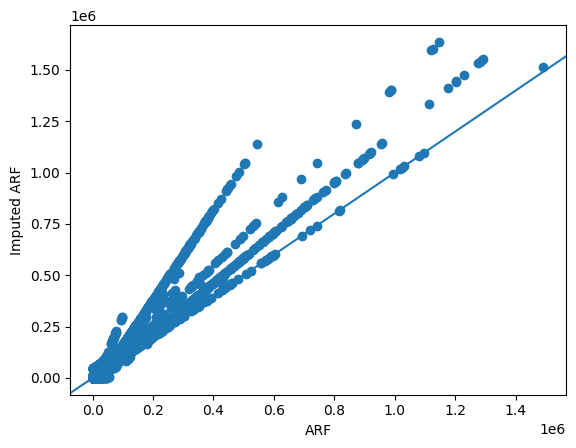

In [69]:
plt.scatter(train_df['arf'], train_df['arf_impute_formula'])
plt.xlabel("ARF")
plt.ylabel("Imputed ARF")
plt.axline((0, 0), slope=1)
plt.show()

#### KNN imputer 

In [70]:
from sklearn.impute import KNNImputer, SimpleImputer
pd.set_option('display.max_columns', None)
from utils.melissa_utils import generic_one_hotencoding, vehicle_type_fit_transform, vehicle_type_fit
from utils.kanhon_utils import LTADataImputer, EmissionImputer
import os

###### impute omv

In [71]:
csv_filename = r'./dataset/lta_omv_data.csv'

if os.path.exists(csv_filename):
    df_lta_car_data = pd.read_csv(csv_filename)
else:
    result_ls = get_lta_omv_data(2002, 2025)
    df_lta_car_data = preprocess_lta_omv_data(result_ls)
    df_lta_car_data.to_csv(csv_filename)


In [72]:
lta_data_imputer = LTADataImputer(df_lta_car_data)

train_df = lta_data_imputer.transform(train_df) # before transform: 49 rows missing, after transform: 24 rows missing
val_df = lta_data_imputer.transform(val_df) # before transform: 15 rows missing, after transform: 9 rows missing

imputer = SimpleImputer(strategy='median')
train_df['omv'] = imputer.fit_transform(train_df[['omv']])
val_df['omv'] = imputer.transform(val_df[['omv']])

In [73]:
train_df , vehicle_type_encoder = vehicle_type_fit_transform(train_df, "type_of_vehicle")
val_df = vehicle_type_fit(val_df, vehicle_type_encoder)
# test_df = vehicle_type_fit(test_df, vehicle_type_encoder)

In [74]:
train_df.columns

Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category',
       'features', 'accessories', 'indicative_price', 'price', 'reg_date_dt',
       'reg_date_year', 'reg_date_month', 'arf_impute_formula',
       'type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback',
       'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan',
       'type_of_vehicle_mpv', 'type_of_vehicle_others',
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van'],
      dtype='object')

In [33]:
# Select features relevant for imputation
features = ['manufactured', 'reg_date_year', 'omv', 'arf', 'type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback',
       'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan',
       'type_of_vehicle_mpv', 'type_of_vehicle_others',
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van']

# Extract the subset of data for imputation
impute_df = train_df[features]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_array = imputer.fit_transform(impute_df)

# Create a DataFrame from the imputed array
imputed_df = pd.DataFrame(imputed_array, columns=features)

# Add the imputed 'arf' values back to the original DataFrame
train_df['arf_impute'] = imputed_df['arf']

# Display the DataFrame with imputed values
print("\nDataFrame with Imputed ARF Values:")
print(train_df[['listing_id', 'omv', 'arf', 'arf_impute']])


DataFrame with Imputed ARF Values:
       listing_id       omv       arf  arf_impute
0         1260733   37994.0    1900.0      1900.0
1         1289505   14211.0   14211.0     14211.0
2         1316182   17199.0   17199.0     17199.0
3         1310514   22799.0   23919.0     23919.0
4         1247893   21074.0   21504.0     21504.0
...           ...       ...       ...         ...
19995     1330095   27677.0   25748.0     25748.0
19996     1300273   18974.0   13974.0     13974.0
19997     1316903   16213.0    6213.0      6213.0
19998     1329593  300022.0  512040.0    512040.0
19999     1321619   91730.0   91730.0     91730.0

[20000 rows x 4 columns]


In [37]:
imputed_arf_df = train_df[train_df['arf'].isna()][['listing_id', 'omv', 'arf', 'arf_impute']]

In [51]:
plt.scatter(train_df['arf'], train_df['arf_impute'])

KeyError: 'arf_impute'

In [50]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_id         25000 non-null  int64         
 1   title              25000 non-null  object        
 2   make               23684 non-null  object        
 3   model              25000 non-null  object        
 4   description        24320 non-null  object        
 5   manufactured       24993 non-null  float64       
 6   original_reg_date  255 non-null    object        
 7   reg_date           25000 non-null  object        
 8   type_of_vehicle    25000 non-null  object        
 9   category           25000 non-null  object        
 10  transmission       25000 non-null  object        
 11  curb_weight        24693 non-null  float64       
 12  power              22360 non-null  float64       
 13  fuel_type          5879 non-null   object        
 14  engine

### Eco-category

In [12]:
orig_df_emission_data = pd.read_csv(r'./dataset/train_data_scrapped_co2_emission.csv')
test_df_emission_data = pd.read_csv(r'./dataset/test_data_scrapped_co2_emission.csv')

In [13]:
orig_df_emission_data

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month,scrapped_emission_data
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,2018-03-08,2018,3,UNKNOWN
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12,136 g/km (As tested by LTA)
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,2007-09-19,2007,9,unknown
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,2008-12-15,2008,12,164 g/km (As tested by LTA)
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,2006-12-22,2006,12,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,NaN,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7,unknown
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,"ceo car chauffeur driven, always sheltered par...",2018.0,23-aug-2018,29-apr-2020,suv,"parf car, direct owner sale, rare & exotic",...,NaN,uncategorized,"4.0 liter twin turbocharged v8 engine, produci...","panoramic roof, 8""touchscreen display, navigat...",NaN,412888.0,2020-04-29,2020,4,UNKNOWN
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,great for short term drive or to renew coe. op...,2014.0,NaN,01-apr-2015,hatchback,"parf car, premium ad car, low mileage car, sgc...",...,NaN,uncategorized,1.6l inline 4 turbocharged engine with 7 speed...,"dual electric seats with 3 memory settings, di...",NaN,23888.0,2015-04-01,2015,4,165 g/km (As tested by LTA)
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,sporty audi a3 in town with upgraded coil over...,2017.0,NaN,30-jun-2017,hatchback,parf car,...,NaN,uncategorized,"fuel efficient 3 cylinder turbocharged engine,...","bbs sport rim, audi mmi/bluetooth/audio sound ...",NaN,53300.0,2017-06-30,2017,6,111 g/km (As tested by LTA)


In [24]:
def extract_emission(text):
    if not isinstance(text, str):
        return None
    # Regex pattern to extract the numeric value before "g/km"
    pattern = r"(\d+)\s*g/km"

    # Search for the pattern in the text
    match = re.search(pattern, text)
    
    # Return the numeric value if found, otherwise None
    if match:
        return int(match.group(1))  # Convert to integer if needed
    else:
        return None
orig_df_emission_data['emission_data'] = orig_df_emission_data['scrapped_emission_data'].apply(extract_emission)
orig_df_emission_data

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month,scrapped_emission_data,emission_data
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0,2018-03-08,2018,3,UNKNOWN,NaN
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0,2017-12-28,2017,12,136 g/km (As tested by LTA),136.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0,2007-09-19,2007,9,unknown,NaN
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0,2008-12-15,2008,12,164 g/km (As tested by LTA),164.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0,2006-12-22,2006,12,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1329201,Mercedes-Benz C-Class C180 (COE till 06/2031),mercedes-benz,c180,elegant looking and very well maintained by ow...,2011.0,NaN,14-jul-2011,luxury sedan,"coe car, premium ad car, low mileage car",...,uncategorized,inline 4 16 valves rwd engine displacement 179...,new battery new throttle body new recording ca...,NaN,85000.0,2011-07-14,2011,7,unknown,NaN
24996,1285898,Bentley Bentayga 4.0A V8,bentley,bentayga,"ceo car chauffeur driven, always sheltered par...",2018.0,23-aug-2018,29-apr-2020,suv,"parf car, direct owner sale, rare & exotic",...,uncategorized,"4.0 liter twin turbocharged v8 engine, produci...","panoramic roof, 8""touchscreen display, navigat...",NaN,412888.0,2020-04-29,2020,4,UNKNOWN,NaN
24997,1306309,Mercedes-Benz A-Class A180,mercedes-benz,a180,great for short term drive or to renew coe. op...,2014.0,NaN,01-apr-2015,hatchback,"parf car, premium ad car, low mileage car, sgc...",...,uncategorized,1.6l inline 4 turbocharged engine with 7 speed...,"dual electric seats with 3 memory settings, di...",NaN,23888.0,2015-04-01,2015,4,165 g/km (As tested by LTA),165.0
24998,1306902,Audi A3 Sportback 1.0A TFSI S-tronic,audi,a3,sporty audi a3 in town with upgraded coil over...,2017.0,NaN,30-jun-2017,hatchback,parf car,...,uncategorized,"fuel efficient 3 cylinder turbocharged engine,...","bbs sport rim, audi mmi/bluetooth/audio sound ...",NaN,53300.0,2017-06-30,2017,6,111 g/km (As tested by LTA),111.0


In [34]:
emission_imputer = EmissionImputer(train_csv_dir=r'./dataset/train_data_scrapped_co2_emission.csv', test_csv_dir =r'./dataset/test_data_scrapped_co2_emission.csv')

In [46]:
train_df = emission_imputer.impute_values(df=train_df, df_type='train')


In [47]:
imputer = SimpleImputer(strategy='median')
train_df['emission_data'] = imputer.fit_transform(train_df[['emission_data']])
# val_df['emission_data'] = imputer.transform(val_df[['emission_data']])
# test_df['emission_data'] = imputer.transform(test_df[['emission_data']])

In [48]:
train_df

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_dt,reg_date_year,reg_date_month,emission_data
0,1260733,Isuzu NPR85,isuzu,npr85,cheapest in the market! 14 feet full canopy wi...,2019.0,NaN,01-jul-2020,truck,premium ad car,auto,2500.0,NaN,diesel,2999.0,2.0,14860.0,22085,NaN,13348.0,NaN,37994.0,1900.0,NaN,30-jun-2040,uncategorized,view specs of the isuzu n series diesel,NaN,NaN,89800.0,2020-07-01,2020,7,149.0
1,1289505,Honda Fit 1.3A G (COE till 06/2024),NaN,fit,200,2009.0,NaN,12-aug-2009,hatchback,coe car,auto,1010.0,73.0,NaN,1339.0,5.0,NaN,14920,885.0,123.0,NaN,14211.0,14211.0,NaN,NaN,uncategorized,view specs of the honda fit,NaN,NaN,700.0,2009-08-12,2009,8,149.0
2,1316182,Toyota Sienta 1.5A,toyota,sienta,non phv. excellent condition. 100% accident fr...,2018.0,NaN,28-may-2018,mpv,"parf car, premium ad car",auto,1325.0,79.0,NaN,1496.0,2.0,14530.0,38001,682.0,25880.0,80346.0,17199.0,17199.0,NaN,NaN,uncategorized,"1.5l dohc 16v vvt-i engine, 7 speed cvt-i auto...",factory touchscreen audio system with reverse ...,NaN,64800.0,2018-05-28,2018,5,149.0
3,1310514,Volvo V40 T4 Momentum,volvo,v40,"well maintained! the safety, reliable and dura...",2018.0,NaN,30-aug-2019,hatchback,parf car,auto,1441.0,140.0,NaN,1969.0,1.0,15770.0,36901,1176.0,35358.0,68000.0,22799.0,23919.0,NaN,NaN,uncategorized,powerful 2.0l 4 cylinder inline 16 valve turbo...,"keyless entry/start, cruise control, auto head...",NaN,92800.0,2019-08-30,2019,8,128.0
4,1247893,Kia Carens 2.0A GDI,kia,carens,rare 1 owner unit! low km done! fully maintain...,2015.0,NaN,18-nov-2015,mpv,parf car,auto,1544.0,122.0,NaN,1999.0,1.0,15540.0,58190,1212.0,20117.0,130000.0,21074.0,21504.0,NaN,NaN,uncategorized,view specs of the kia carens,upgraded headunit with reverse camera! factory...,NaN,32888.0,2015-11-18,2015,11,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1330095,BMW 3 Series 318i,bmw,318i,0,2015.0,NaN,26-feb-2016,luxury sedan,"parf car, consignment car, sgcarmart warranty ...",auto,1425.0,100.0,NaN,1499.0,4.0,16790.0,46970,684.0,21136.0,167000.0,27677.0,25748.0,NaN,NaN,uncategorized,powered by 134bhp and 1.5l twinpower turbochar...,"upgraded rims, brembo brakes, carbon steering,...",NaN,37800.0,2016-02-26,2016,2,149.0
19996,1300273,Nissan Qashqai 1.2A DIG-T,nissan,qashqai,"no repairs needed, buy and drive as it is! one...",2016.0,NaN,17-jun-2016,suv,"parf car, premium ad car",auto,1285.0,85.0,NaN,1197.0,2.0,13330.0,53694,508.0,19138.0,NaN,18974.0,13974.0,NaN,NaN,uncategorized,1.2l 4 cylinder inline 16 valve dohc turbochar...,"auto headlights, multi function steering wheel...",NaN,33688.0,2016-06-17,2016,6,129.0
19997,1316903,Honda Jazz 1.3A,honda,jazz,"1 owner, maintain by honda kah motor, at dicks...",2019.0,NaN,10-jul-2019,hatchback,parf car,auto,1052.0,73.0,NaN,1318.0,1.0,14180.0,30009,578.0,19312.0,61600.0,16213.0,6213.0,NaN,NaN,uncategorized,"1.3l i-vtec engine, cvt auto transmission with...","3 day money back, certified cars, one year war...",NaN,73800.0,2019-07-10,2019,7,119.0
19998,1329593,Ferrari 488 GTB,ferrari,488,ital unit with warranty till dec 2024. fully s...,2016.0,NaN,03-nov-2016,sports car,"parf car, direct owner sale, rare & exotic, lo...",auto,1515.0,493.0,NaN,3902.0,3.0,181520.0,55501,3796.0,319267.0,38000.0,300022.0,512040.0,NaN,NaN,uncategorized,a ferrari 488 gtb needs no extra words. view s...,"cf rear air ducts, cf under door cover,!lifter...",NaN,649900.0,2016-11-03,2016,11,277.0


### SHAP

In [49]:
# display(HTML(train_df.head(50).to_html()))
features = ['curb_weight', 'power', 'cylinder_cnt', 'omv',
       'engine_cap', 'depreciation', 'mileage', 'no_of_owners','type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback',
       'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan',
       'type_of_vehicle_mpv', 'type_of_vehicle_others',
       'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon',
       'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van']

train_df[features].isna().sum()

KeyError: "['cylinder_cnt', 'type_of_vehicle_bus/mini bus', 'type_of_vehicle_hatchback', 'type_of_vehicle_luxury sedan', 'type_of_vehicle_mid-sized sedan', 'type_of_vehicle_mpv', 'type_of_vehicle_others', 'type_of_vehicle_sports car', 'type_of_vehicle_stationwagon', 'type_of_vehicle_suv', 'type_of_vehicle_truck', 'type_of_vehicle_van'] not in index"

### Debug train

In [2]:
import pandas as pd
from utils.constants import *
from sklearn.model_selection import KFold, StratifiedShuffleSplit,ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import ensemble, svm, tree, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import Normalizer, MaxAbsScaler, MinMaxScaler, StandardScaler, QuantileTransformer, RobustScaler, PowerTransformer
from sklearn.metrics import root_mean_squared_error,root_mean_squared_log_error, r2_score, median_absolute_error,mean_absolute_percentage_error,mean_absolute_error, max_error
import xgboost as xgb
# REF: SCALERS -- https://medium.com/@daython3/scaling-your-data-using-scikit-learn-scalers-3d4b584107d7

## Flags
raw_data=False
impute_type = "simple"
impute_strategy = "median" # mean, median, most_frequent, constant, Callable 
impute_neighbours = 5
randome_state = 0
impute_max_iter= 10
scaler_type = "minmax"
model_type = "xgb"
features = ['curb_weight', 'power', 'cylinder_cnt', 'omv', 'dereg_value', 'car_age', 'depreciation', 'arf','coe', 'road_tax',
       'engine_cap', 'depreciation', 'mileage', 'no_of_owners']
CV_FOLDS = 5
# {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}  , epsilon = 0.1 ,C = 10
svr_kernel = 'rbf'
# Fold types
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Options (Can add more)
scaler_choice = {
    "minmax":  MinMaxScaler(),
    "robust": RobustScaler(),
    "standard": StandardScaler()
}

impute_choice = {
    "simple" : SimpleImputer(strategy=impute_strategy),
    "KNN" : KNNImputer(n_neighbors=impute_neighbours),
    "iterative": IterativeImputer(max_iter=impute_max_iter, random_state=randome_state)
}

model_choice  = {
            "decision_tree": tree.DecisionTreeRegressor(),
            "random_forest": ensemble.RandomForestRegressor(),
            "lr": linear_model.LinearRegression(),
            "knn": KNeighborsRegressor(),
            'gb': ensemble.GradientBoostingRegressor(),
            "svr": svm.SVR(kernel=svr_kernel ),
            "xgb": xgb.XGBRegressor(max_depth=5),
        }

# Do switching
if raw_data:
    test_size=0.2
    random_state=42
    shuffle=True
    orig_df = pd.read_csv(r"./dataset/train.csv")
    ## Split into train val split
    train_df, val_df = train_test_split(orig_df, test_size=test_size, random_state=random_state, shuffle=shuffle)

else:
    # Reading the dataset
    train_df = pd.read_csv(f"{local_path}/{folder}/{train_dataset}")
    val_df = pd.read_csv(f"{local_path}/{folder}/{val_dataset}")
# Get other scores
# [TODO] :: Should we add a missing indicator as well?
# from sklearn.impute import MissingIndicator
# indicator = MissingIndicator()
# missing_mask = indicator.fit_transform(X)

# Selection
imputer = impute_choice[impute_type]
scaler = scaler_choice[scaler_type]
model = model_choice[model_type]

# Average cv score -- limitation is that it does not give best model
# cv = cross_validate(model, X, y, cv=5, return_train_score=True)
# Prepare data

train_df[features] = imputer.fit_transform(train_df[features])
val_df[features] = imputer.transform(val_df[features])

# Fit and transform the numerical columns
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])

X_train = train_df[features].values
y_train = train_df['price'].values
print(X_train, y_train)
X_val = val_df[features].values
y_val = val_df['price'].values


[[0.08199325 0.14965986 0.27272727 ... 0.02160209 0.03996299 0.15727559]
 [0.02283105 0.09931973 0.27272727 ... 0.0162717  0.14064093 0.41129242]
 [0.0353385  0.10748299 0.27272727 ... 0.0210575  0.06228299 0.15727559]
 ...
 [0.02449871 0.09931973 0.27272727 ... 0.0204799  0.0477512  0.07260331]
 [0.04288267 0.6707483  0.63636364 ... 0.29663674 0.02945661 0.24194786]
 [0.05221362 0.27210884 0.27272727 ... 0.01904416 0.14986334 0.24194786]] [ 89800.    700.  64800. ...  73800. 649900.  53888.]


In [3]:
X_train, y_train
# print(X_train.info(), type(y_train.info()))


(array([[0.08199325, 0.14965986, 0.27272727, ..., 0.02160209, 0.03996299,
         0.15727559],
        [0.02283105, 0.09931973, 0.27272727, ..., 0.0162717 , 0.14064093,
         0.41129242],
        [0.0353385 , 0.10748299, 0.27272727, ..., 0.0210575 , 0.06228299,
         0.15727559],
        ...,
        [0.02449871, 0.09931973, 0.27272727, ..., 0.0204799 , 0.0477512 ,
         0.07260331],
        [0.04288267, 0.6707483 , 0.63636364, ..., 0.29663674, 0.02945661,
         0.24194786],
        [0.05221362, 0.27210884, 0.27272727, ..., 0.01904416, 0.14986334,
         0.24194786]]),
 array([ 89800.,    700.,  64800., ...,  73800., 649900.,  53888.]))

In [4]:
model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [5]:

# Fit the model

# [TODO] We can do this on all as well
scores = cross_val_score(model, X_train, y_train, cv=CV_FOLDS, scoring="neg_root_mean_squared_error").mean()

# Evaluate on the hold-out set
y_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

# Metrics that we are tracking
train_rmse = root_mean_squared_error(y_train, y_train_pred)
holdout_rmse = root_mean_squared_error(y_val, y_pred)
holdout_r2 = r2_score(y_val, y_pred)
holdout_mae = mean_absolute_error(y_val, y_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
holdout_max_error = max_error(y_val, y_pred)
train_max_error= max_error(y_train, y_train_pred)
holdout_mape = mean_absolute_percentage_error(y_val, y_pred)

print("scores: %f" % scores)
print("train_rmse: %f" % train_rmse)
print("train_mae: %f" % train_mae)
print("train_max_error: %f" % train_max_error)

print("holdout_rmse: %f" % holdout_rmse)
print("holdout_r2: %f" % holdout_r2)
print("holdout_mae: %f" % holdout_mae)
print("holdout_max_error: %f" % holdout_max_error)
print("holdout_mape: %f" % holdout_mape)

scores: -31731.155072
train_rmse: 8318.799205
train_mae: 4894.696659
train_max_error: 150848.500000
holdout_rmse: 26197.878428
holdout_r2: 0.966682
holdout_mae: 7445.751464
holdout_max_error: 1130214.617188
holdout_mape: 0.080499


### Finetune XGBoost

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error


In [7]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],    # L2 regularization
}

# Initialize XGBRegressor
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Set up the randomized search with RMSE as the scoring metric
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),  # Negative RMSE for maximizing
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_xgb = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [8]:
# Predict on the training and holdout sets
y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)

# Calculate metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_max_error = max_error(y_train, y_train_pred)

holdout_rmse = root_mean_squared_error(y_val, y_val_pred)
holdout_r2 = r2_score(y_val, y_val_pred)
holdout_mae = mean_absolute_error(y_val, y_val_pred)
holdout_max_error = max_error(y_val, y_val_pred)
holdout_mape = mean_absolute_percentage_error(y_val, y_val_pred)

# Print metrics to compare
print(f"train_rmse: {train_rmse}")
print(f"train_mae: {train_mae}")
print(f"train_max_error: {train_max_error}")

print(f"holdout_rmse: {holdout_rmse}")
print(f"holdout_r2: {holdout_r2}")
print(f"holdout_mae: {holdout_mae}")
print(f"holdout_max_error: {holdout_max_error}")
print(f"holdout_mape: {holdout_mape}")


train_rmse: 9801.033126986567
train_mae: 5068.00184128418
train_max_error: 289944.25
holdout_rmse: 24959.694097240375
holdout_r2: 0.9697570766509036
holdout_mae: 7079.419566845703
holdout_max_error: 1124236.390625
holdout_mape: 0.07457753059571562


### Finetune SVR

In [57]:
from sklearn.svm import SVR
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5, 1],       # Insensitivity zone within which errors are not penalized
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto']            # Kernel coefficient for 'rbf', 'poly' kernels
}


In [58]:
# Create a GridSearchCV object with RMSE scoring
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,

    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),  # Negative RMSE for maximizing
    cv=3,          # 3-fold cross-validation
    verbose=1,     # For tracking the progress
    n_jobs=-1      # Use all available cores
)


In [59]:
# Fit GridSearchCV to the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best RMSE found: ", -random_search.best_score_)  # Multiply by -1 because RMSE is returned as negative in make_scorer


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 1, 'C': 100}
Best RMSE found:  145538.30410416654


In [60]:
# Get the best model and parameters
best_svr = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 1, 'C': 100}


In [61]:
# Predict on the training and holdout sets
y_train_pred = best_svr.predict(X_train)
y_val_pred = best_svr.predict(X_val)

# Calculate metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_max_error = max_error(y_train, y_train_pred)

holdout_rmse = root_mean_squared_error(y_val, y_val_pred)
holdout_r2 = r2_score(y_val, y_val_pred)
holdout_mae = mean_absolute_error(y_val, y_val_pred)
holdout_max_error = max_error(y_val, y_val_pred)
holdout_mape = mean_absolute_percentage_error(y_val, y_val_pred)

# Print metrics to compare
print(f"train_rmse: {train_rmse}")
print(f"train_mae: {train_mae}")
print(f"train_max_error: {train_max_error}")

print(f"holdout_rmse: {holdout_rmse}")
print(f"holdout_r2: {holdout_r2}")
print(f"holdout_mae: {holdout_mae}")
print(f"holdout_max_error: {holdout_max_error}")
print(f"holdout_mape: {holdout_mape}")

train_rmse: 139917.4112481794
train_mae: 55277.33918234207
train_max_error: 2593097.993339162
holdout_rmse: 125924.60523223758
holdout_r2: 0.2302203106434908
holdout_mae: 54107.38336166122
holdout_max_error: 2175540.8416254367
holdout_mape: 0.6923916733101433


### Testing lightgbm

In [9]:
import lightgbm as lgb


In [10]:
# Define the LightGBM model with initial parameters
lgb_model = lgb.LGBMRegressor(
    boosting_type="gbdt",
    num_iterations=2500,
    learning_rate=0.05,
    num_leaves=15,
    tree_learner='feature',
    max_depth=10,
    min_data_in_leaf=7,
    bagging_fraction=1,
    bagging_freq=100,
    reg_sqrt=True,
    metric='rmse',
    feature_fraction=0.6,
    random_state=42
)

# Define the parameter grid
param_distributions = {
    'num_leaves': [10, 15, 20, 25, 30, 35],
    'max_depth': [5, 10, 15, 20, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_samples': [5, 10, 15, 20, 30],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 regularization
}

# Set up the RandomizedSearchCV with RMSE as the scoring metric
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),  # Negative RMSE
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best RMSE found: ", -random_search.best_score_)  # Multiply by -1 because RMSE is negative

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\kan_h\.conda\envs\cs5228\lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.6 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.6 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the 

In [12]:
# Predict on the training and holdout sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_max_error = max_error(y_train, y_train_pred)

holdout_rmse = root_mean_squared_error(y_val, y_val_pred)
holdout_r2 = r2_score(y_val, y_val_pred)
holdout_mae = mean_absolute_error(y_val, y_val_pred)
holdout_max_error = max_error(y_val, y_val_pred)
holdout_mape = mean_absolute_percentage_error(y_val, y_val_pred)

# Print metrics to compare
print(f"train_rmse: {train_rmse}")
print(f"train_mae: {train_mae}")
print(f"train_max_error: {train_max_error}")

print(f"holdout_rmse: {holdout_rmse}")
print(f"holdout_r2: {holdout_r2}")
print(f"holdout_mae: {holdout_mae}")
print(f"holdout_max_error: {holdout_max_error}")
print(f"holdout_mape: {holdout_mape}")

train_rmse: 8318.799204821767
train_mae: 4894.696658776856
train_max_error: 150848.5
holdout_rmse: 26197.878427738255
holdout_r2: 0.9666821094750745
holdout_mae: 7445.751463671875
holdout_max_error: 1130214.6171875
holdout_mape: 0.080499449451142


### No Preprocessing, drop all

In [93]:
from sklearn.model_selection import train_test_split


In [109]:
test_size=0.2
random_state=42
shuffle=True
orig_df = pd.read_csv(r"./dataset/train.csv")
## Split into train val split
train_df, val_df = train_test_split(orig_df, test_size=test_size, random_state=random_state, shuffle=shuffle)
features = ['curb_weight', 'power',  'omv', 'dereg_value', 'depreciation', 'arf','coe', 'road_tax',
       'engine_cap', 'depreciation', 'mileage', 'no_of_owners']
train_df = train_df.dropna(subset=features)
# val_df = val_df.dropna(subset=features)


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14393 entries, 1020 to 15795
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   listing_id         14393 non-null  int64  
 1   title              14393 non-null  object 
 2   make               13642 non-null  object 
 3   model              14393 non-null  object 
 4   description        14186 non-null  object 
 5   manufactured       14392 non-null  float64
 6   original_reg_date  41 non-null     object 
 7   reg_date           14393 non-null  object 
 8   type_of_vehicle    14393 non-null  object 
 9   category           14393 non-null  object 
 10  transmission       14393 non-null  object 
 11  curb_weight        14393 non-null  float64
 12  power              14393 non-null  float64
 13  fuel_type          2041 non-null   object 
 14  engine_cap         14393 non-null  float64
 15  no_of_owners       14393 non-null  float64
 16  depreciation       14393

In [111]:

# Get other scores
# [TODO] :: Should we add a missing indicator as well?
# from sklearn.impute import MissingIndicator
# indicator = MissingIndicator()
# missing_mask = indicator.fit_transform(X)

# Selection
# imputer = impute_choice[impute_type]
# scaler = scaler_choice[scaler_type]
# model = model_choice[model_type]

# Average cv score -- limitation is that it does not give best model
# cv = cross_validate(model, X, y, cv=5, return_train_score=True)
# Prepare data

# train_df[features] = imputer.fit_transform(train_df[features])
# val_df[features] = imputer.transform(val_df[features])

# Fit and transform the numerical columns
train_df[features] = scaler.fit_transform(train_df[features])
val_df[features] = scaler.transform(val_df[features])

X_train = train_df[features].values
y_train = train_df['price'].values
print(X_train, y_train)
X_val = val_df[features].values
y_val = val_df['price'].values

[[0.25670609 0.05202312 0.01829877 ... 0.0110861  0.06228299 0.2       ]
 [0.29016441 0.14017341 0.02597408 ... 0.01315329 0.05271244 0.        ]
 [0.31987309 0.11416185 0.02360981 ... 0.01276986 0.1007745  0.        ]
 ...
 [0.28554947 0.08236994 0.03265982 ... 0.01485371 0.12945669 0.6       ]
 [0.17796366 0.0433526  0.01694736 ... 0.01050263 0.0477512  0.        ]
 [0.31150851 0.65028902 0.40593356 ... 0.28947237 0.02945661 0.4       ]] [ 64800.  92800.  32888. ...  37800.  73800. 649900.]


In [112]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3],    # L2 regularization
}

# Initialize XGBRegressor
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Set up the randomized search with RMSE as the scoring metric
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),  # Negative RMSE for maximizing
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_xgb = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [113]:
# Predict on the training and holdout sets
y_train_pred = best_xgb.predict(X_train)
y_val_pred = best_xgb.predict(X_val)

# Calculate metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_max_error = max_error(y_train, y_train_pred)

holdout_rmse = root_mean_squared_error(y_val, y_val_pred)
holdout_r2 = r2_score(y_val, y_val_pred)
holdout_mae = mean_absolute_error(y_val, y_val_pred)
holdout_max_error = max_error(y_val, y_val_pred)
holdout_mape = mean_absolute_percentage_error(y_val, y_val_pred)

# Print metrics to compare
print(f"train_rmse: {train_rmse}")
print(f"train_mae: {train_mae}")
print(f"train_max_error: {train_max_error}")

print(f"holdout_rmse: {holdout_rmse}")
print(f"holdout_r2: {holdout_r2}")
print(f"holdout_mae: {holdout_mae}")
print(f"holdout_max_error: {holdout_max_error}")
print(f"holdout_mape: {holdout_mape}")


train_rmse: 1547.281566488175
train_mae: 1115.0866383886698
train_max_error: 11789.3125
holdout_rmse: 75650.97692492903
holdout_r2: 0.7221730742364796
holdout_mae: 16961.04187314453
holdout_max_error: 1359300.875
holdout_mape: 0.8677080177472908


### 

### Test submission

In [83]:
test_df[features]

,curb_weight,power,cylinder_cnt,omv,dereg_value,car_age,depreciation,arf,coe,road_tax,engine_cap,depreciation,mileage,no_of_owners
0,1190.0,96.0,4.0,19229.0,9582.0,9.0,17660.0,9229.0,57199,682.0,1496.0,17660.0,112000.0,2.0
1,1235.0,79.0,4.0,14347.0,13644.0,17.0,10920.0,15782.0,42564,1113.0,1598.0,10920.0,120000.0,1.0
2,1535.0,141.0,4.0,39863.0,54818.0,5.0,22120.0,47809.0,32801,1210.0,1998.0,22120.0,43000.0,1.0
3,1100.0,79.0,4.0,15573.0,26363.0,5.0,13700.0,15573.0,29159,682.0,1496.0,13700.0,53300.0,3.0
4,1324.0,88.0,4.0,18097.0,15197.0,9.0,14190.0,13097.0,56001,682.0,1496.0,14190.0,149000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1563.0,119.0,4.0,19388.0,40705.0,4.0,16830.0,19388.0,41503,680.0,1490.0,16830.0,50000.0,2.0
9996,1480.0,96.0,4.0,34087.0,104529.0,2.0,21290.0,39722.0,86000,586.0,1332.0,21290.0,8500.0,1.0
9997,1625.0,115.0,4.0,42233.0,22004.0,14.0,12060.0,42233.0,34935,1691.0,1995.0,12060.0,163955.0,4.0
9998,1287.0,93.0,4.0,14799.0,28242.0,5.0,13720.0,14799.0,30010,738.0,1591.0,13720.0,85473.0,1.0


In [72]:
test_df = pd.read_csv('dataset/test_data_cleaned.csv')

In [84]:
test_df[features] = imputer.transform(test_df[features])

# Fit and transform the numerical columns
test_df[features] = scaler.transform(test_df[features])

In [85]:
test_df['Predicted'] = model.predict(test_df[features])


[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100


In [86]:
test_df['id'] = test_df.index


In [87]:
test_df.Predicted = test_df.Predicted.apply(lambda x:round(x / 100.0) * 100.0)


In [92]:
submission = test_df[['id','Predicted']]
submission.to_csv(r'./submission/submission-kh.csv',index=False)


### EDA for mileage

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from utils.Bhushan_utils import *

In [46]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

train_df['mileage_t'] = pt.fit_transform(train_df[['mileage']])

In [48]:
depreciation_imputer = DepreciationImputer()
train_df = depreciation_imputer.calc_vehicle_age(train_df) # 0 empty records - due to 'manufactured' having 7 empty records
val_df = depreciation_imputer.calc_vehicle_age(val_df) # 0 empty records
# test_df = depreciation_imputer.calc_vehicle_age(test_df) # 0 empty records


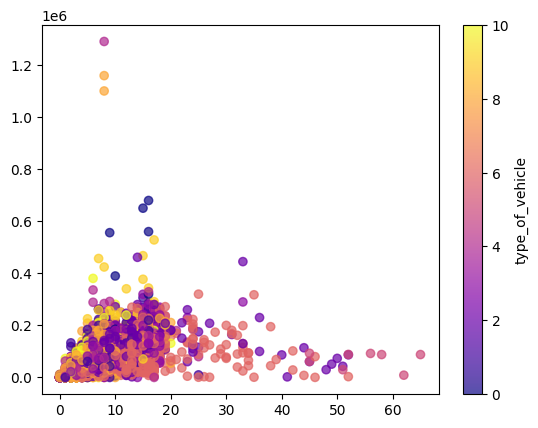

In [50]:
le = LabelEncoder()
train_df['color_code'] = le.fit_transform(train_df['type_of_vehicle'])
scatter = plt.scatter(train_df['car_age'], train_df['mileage'], c=train_df['color_code'], cmap='plasma', alpha=0.7)


plt.colorbar(scatter, label='type_of_vehicle')
plt.show()

In [54]:
train_df['car_age'].info()

<class 'pandas.core.series.Series'>
Index: 20000 entries, 23311 to 23654
Series name: car_age
Non-Null Count  Dtype  
--------------  -----  
20000 non-null  float64
dtypes: float64(1)
memory usage: 312.5 KB


In [56]:
le.classes_

array(['bus/mini bus', 'hatchback', 'luxury sedan', 'mid-sized sedan',
       'mpv', 'others', 'sports car', 'stationwagon', 'suv', 'truck',
       'van'], dtype=object)

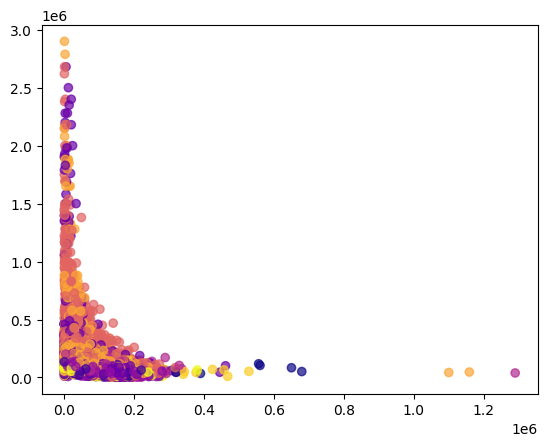

In [55]:
plt.scatter(train_df['mileage'], train_df['price'], c=train_df['color_code'], cmap='plasma', alpha=0.7)
